#**COVID-19 Pandemic Impact on New Voter Registration**
Author: Lillian Pulaski

##**Introduction**

The goal of this research is to explore how the COVID-19 pandemic at the start of 2020 affected voter registration compared to the 2016 election, which was not impacted by the pandemic. Understanding this is crucial for grasping how crises can influence voter participation and how we can maintain high registration rates during challenging times. In the face of national and global crises, it is essential that voters are both willing and able to have a say in government decisions.

####**Research Questions:**


1.   **How do the swing states included in the data (AZ, CA, CO, FL, GA, NC, VA) change from 2016 to 2020 in terms of average new registered voters relative to the non-swing states (DE, DC, IL, MD, TX)?**

2.   **Will the registration rates in California drop more or less than other states considering it is the state with the highest population in the United States?**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

sns.set_theme(style="dark")

In [3]:
voters=pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv')
voters.head()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


In [4]:
voters.isna().any() #there is no missing data or NAs in this data set

,0
Jurisdiction,False
Year,False
Month,False
New registered voters,False


In [5]:
voters.rename(columns={'Jurisdiction':'NAME','New registered voters':'registered_voters'}, inplace=True)

####**Potential Limits to the Data**


*   The data covers only 12 states out of 50, which may not be fully representative of the entire United States. This is especially true since the states included are primarily more southern, which may differ in voter registration trends compared to states further north.
*   The data is limited to the period from January to May, and for most states, it only includes data from January to April. This limits the scope of analysis, since it doesn't capture more long-term trends or changes in voter registration beyond this timeframe.


## **Explatory Data Analysis**

In [6]:
voters.sort_values(by='registered_voters', ascending=False)

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281
11,California,2016,Apr,185478
14,California,2020,Mar,176810
10,California,2016,Mar,174278
88,Texas,2016,Mar,170607
...,...,...,...,...
30,Delaware,2020,Mar,2535
39,District of Columbia,2020,Mar,2225
41,District of Columbia,2020,May,1925
40,District of Columbia,2020,Apr,1281


####*The highest amount of new voter registrations was in California in February of 2020 with 238281 new registered voters.*

In [7]:
avg_voters=voters['registered_voters'].mean()
avg_voters

48223.46226415094

####*The average registered voters is approximately 48,223.46 voters per month.*




In [8]:
high_voters=voters[voters['registered_voters']>avg_voters]
high_voters.count()

,0
NAME,36
Year,36
Month,36
registered_voters,36


####*There are 36 instances across all states where the new voter registration was higher than the national average.*

In [9]:
above_avg_by_state=high_voters.groupby('NAME')['registered_voters'].count()
above_avg_by_state

,registered_voters
NAME,
Arizona,3
California,7
Florida,7
Georgia,1
Illinois,4
North Carolina,6
Texas,8


####*Arizona had 3 months when their new voter registration was above the average, California had 7, Florida had 7, Georgia had 1, Illinois had 4, North Carolina had 6, and Texas had 8.*

In [10]:
above_avg_by_state.sort_values(ascending=False).head(3)

,registered_voters
NAME,
Texas,8
California,7
Florida,7


####*Texas, California, and Florida had the highest count of instances where new voter registration was above the average.*

##**Data Visualizations**

<ipython-input-67-658a9be2b045>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_voters, x='NAME', y='registered_voters', palette='gist_stern')


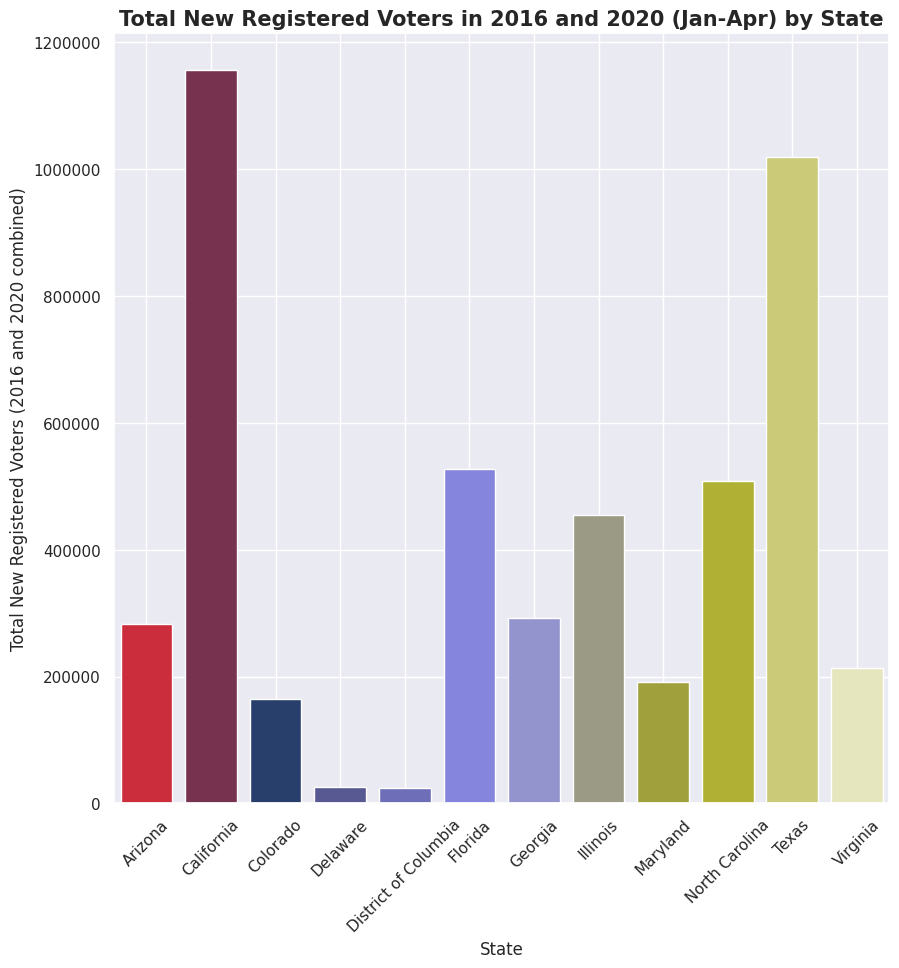

In [67]:
jan_apr_voters=voters[voters['Month']!='May']
total_voters=jan_apr_voters.groupby('NAME')['registered_voters'].sum().reset_index()

plt.figure(figsize=(10,10))
sns.barplot(data=total_voters, x='NAME', y='registered_voters', palette='gist_stern')

plt.xlabel('State')
plt.ylabel('Total New Registered Voters (2016 and 2020 combined)')
plt.title('Total New Registered Voters in 2016 and 2020 (Jan-Apr) by State', fontweight='bold', fontsize=15)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.grid()

plt.show()

####*California and Texas have the highest count of new registered voters from 2016 and 2020 combined. Delaware and the District of Columbia have very low counts.*

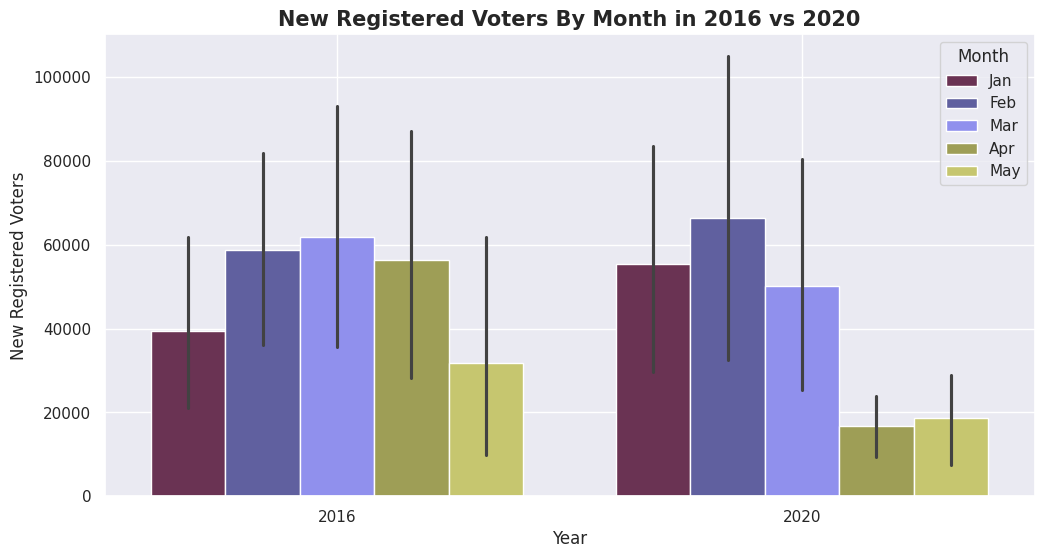

In [66]:
plt.figure(figsize=(12, 6))

sns.barplot(data=voters, x='Year', y='registered_voters', hue='Month', palette='gist_stern')

plt.xlabel('Year')
plt.ylabel('New Registered Voters')
plt.title('New Registered Voters By Month in 2016 vs 2020', fontweight='bold', fontsize=15)
plt.grid()

plt.show()

####*In 2020, counts of new voter registrations are higher relative to 2016 in the beginning of the year (January and February). The COVID-19 pandemic hit in March 2020, and this is reflected in the plot, with the voter registrations decreasing dramatically in April and May.*
####*It's important to note that May has only 4 states worth or data while all other months have data for all 12 states. This could be largely contributing to the apparence of a decline in total new voter registrations in May.*

<ipython-input-65-91455d1e4f97>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_voters, x='State Type', y='Average New Registered Voters', palette=['brown','slateblue','brown','slateblue'])


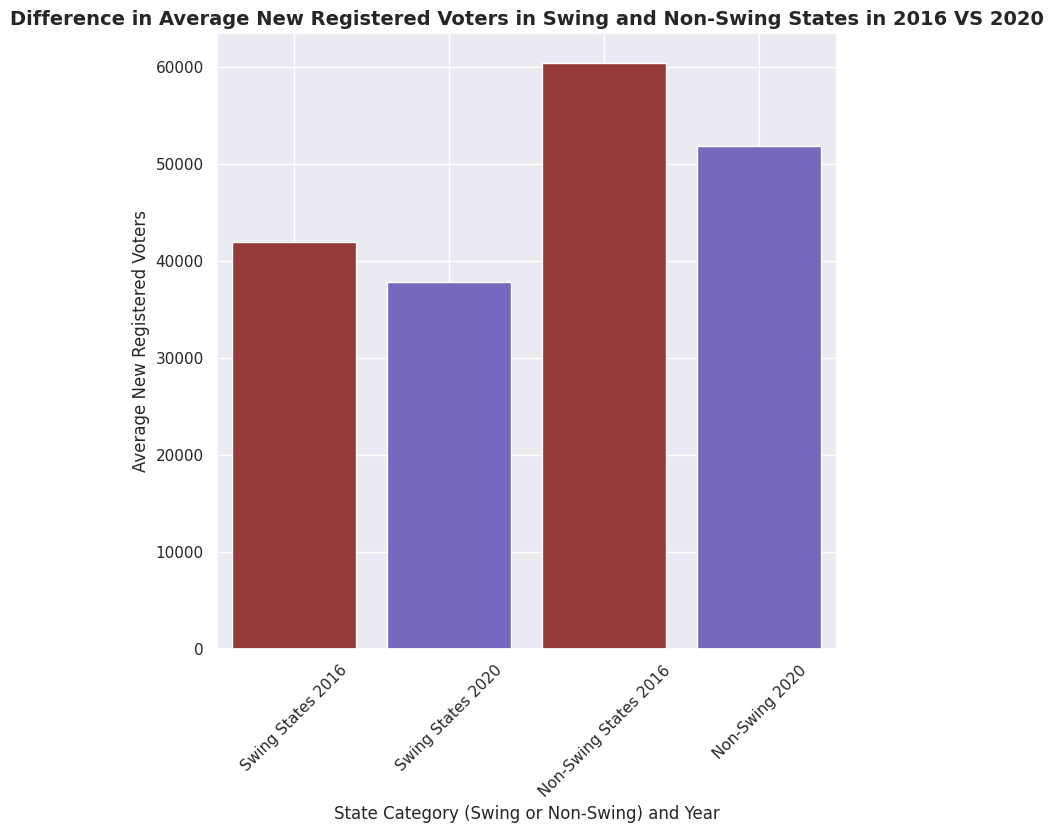

In [65]:
voters_2020=voters[voters['Year']==2020]
voters_2016=voters[voters['Year']==2016]

swing=['Arizona','Colorado','Florida','Georgia','North Carolina','Virginia']
non_swing=['California','Delaware','District of Columbia','Illinios','Maryland','Texas']

#2020 DATA
swing_voters_20=voters_2020[voters_2020['NAME'].isin(swing)]
non_swing_voters_20=voters_2020[voters_2020['NAME'].isin(non_swing)]

#2016 DATA
swing_voters_16=voters_2016[voters_2016['NAME'].isin(swing)]
non_swing_voters_16=voters_2016[voters_2016['NAME'].isin(non_swing)]

#2020 AVG DATA
avg_swing_voters_20=swing_voters_20['registered_voters'].mean()
avg_non_swing_voters_20=non_swing_voters_20['registered_voters'].mean()

#2016 AVG DATA
avg_swing_voters_16=swing_voters_16['registered_voters'].mean()
avg_non_swing_voters_16=non_swing_voters_16['registered_voters'].mean()


avg_voters=pd.DataFrame({'State Type':['Swing States 2016','Swing States 2020', 'Non-Swing States 2016', 'Non-Swing 2020'], 'Average New Registered Voters':[avg_swing_voters_16,avg_swing_voters_20,avg_non_swing_voters_16,avg_non_swing_voters_20]})

plt.figure(figsize=(8,8))
sns.barplot(data=avg_voters, x='State Type', y='Average New Registered Voters', palette=['brown','slateblue','brown','slateblue'])

plt.title('Difference in Average New Registered Voters in Swing and Non-Swing States in 2016 VS 2020', fontweight='bold', fontsize=14)
plt.xticks(rotation=45)

plt.xlabel('State Category (Swing or Non-Swing) and Year')
plt.ylabel('Average New Registered Voters')

plt.grid()
plt.show()

####*Non-swing states had higher average registrations in both 2016 and 2020, but swing states showed more stability, with a smaller drop in registrations during the year of the pandemic. This suggests that less engaged voters in non-swing states may have been less motivated to register under these circumstances.*

##**Mapping**

In [ ]:
!git clone https://github.com/SFord87/325-Datasets

shapefile='/content/325-Datasets/cb_2018_us_state_500k.shp'
states=gpd.read_file(shapefile)

fatal: destination path '325-Datasets' already exists and is not an empty directory.


In [ ]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]

In [ ]:
avg_voters_state = voters.groupby('NAME', as_index=False)['registered_voters'].mean()
avg_voters_state.columns=['NAME','avg_registered_voters']

In [ ]:
avg_state_map= bbox.merge(avg_voters_state, on="NAME", how="left")
avg_state_map=avg_state_map.drop(columns=["STATEFP","STATENS","LSAD","AFFGEOID","ALAND","AWATER"])

In [ ]:
avg_state_map.head()

,GEOID,STUSPS,NAME,geometry,avg_registered_voters
0,28,MS,Mississippi,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ...",NaN
1,37,NC,North Carolina,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.8
2,40,OK,Oklahoma,"POLYGON ((-103.00256 36.52659, -103.00219 36.6...",NaN
3,51,VA,Virginia,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.2
4,54,WV,West Virginia,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,...",NaN


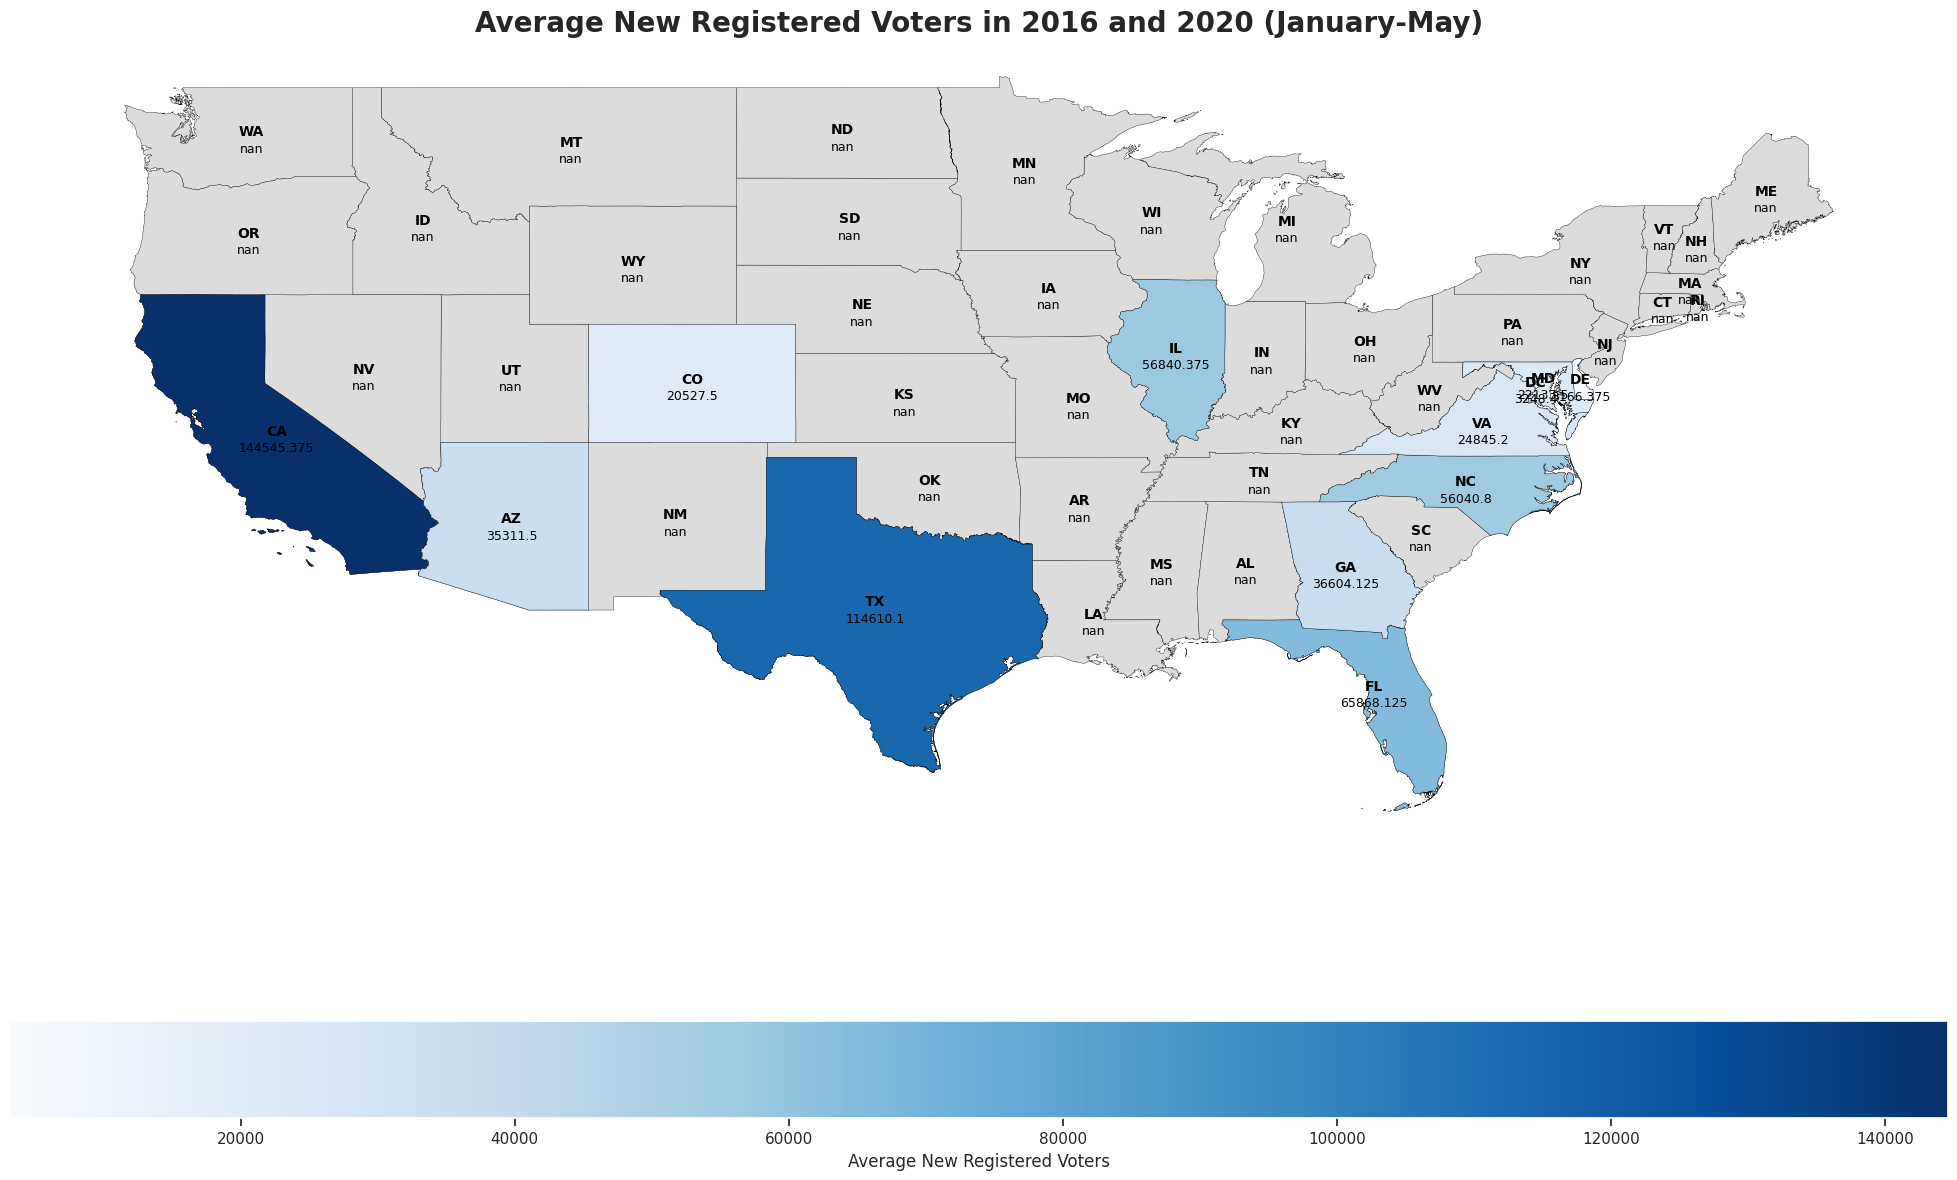

In [ ]:
fig = plt.figure(1, figsize=(25, 15))
ax = fig.add_subplot()
bbox.plot(ax=ax,color="gainsboro", linewidth=.25, edgecolor='black')

avg_state_map.plot(column="avg_registered_voters",ax=ax,linewidth=.25, edgecolor='black',legend=True,cmap="Blues", legend_kwds={"label": "Average New Registered Voters",
            "orientation": "horizontal"})

avg_state_map.apply(lambda x: ax.annotate(text=x.STUSPS, xy=(x.geometry.centroid.x, x.geometry.centroid.y), ha="center", fontsize=10, color="black", fontweight="bold"), axis=1)

avg_state_map.apply(lambda x: ax.annotate(text=x.avg_registered_voters, xy=(x.geometry.centroid.x, x.geometry.centroid.y - 0.55), ha="center", fontsize=9,color="black"), axis=1)

ax.set_axis_off()

plt.title('Average New Registered Voters in 2016 and 2020 (January-May)', fontsize=20, fontweight=600)
plt.show()

## **Conclusion**

From the data analysis and visualizations, California and Texas consistently maintain higher registration rates compared to other states, likely due to their larger populations. However, the data is limited to just 12 states, most of which are southern, and doesn't fully represent national trends. It appears that larger states tend to have higher voter registration numbers, but it’s important to consider whether this is solely due to population size or if other state-specific factors, such as political climate or voter outreach, also play a role. A broader dataset, including northern states and more regions, could provide a clearer picture of national trends.

I would suggest gathering data from all states in the United States to get a more representative view of voter registration trends. Also, gathering data on the method of registration since online voter registration is available in most states could shed light on how effective online registration was in maintaining registration during the pandemic.

Moving forward, it would be beneficial to use data on state populations to compare the percentage change in voter registration relative to population size. As seen in the previous visualizations, large states like California and Texas will naturally have more registered voters in general, making it not comparable to smaller states. Gathering population data from both 2016 and 2020 for the states in this dataset would help determine if changes in voter registration are consistent with population growth or if other factors, such as the pandemic, are truly the causes.

